In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3264\2115344861.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Date'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')


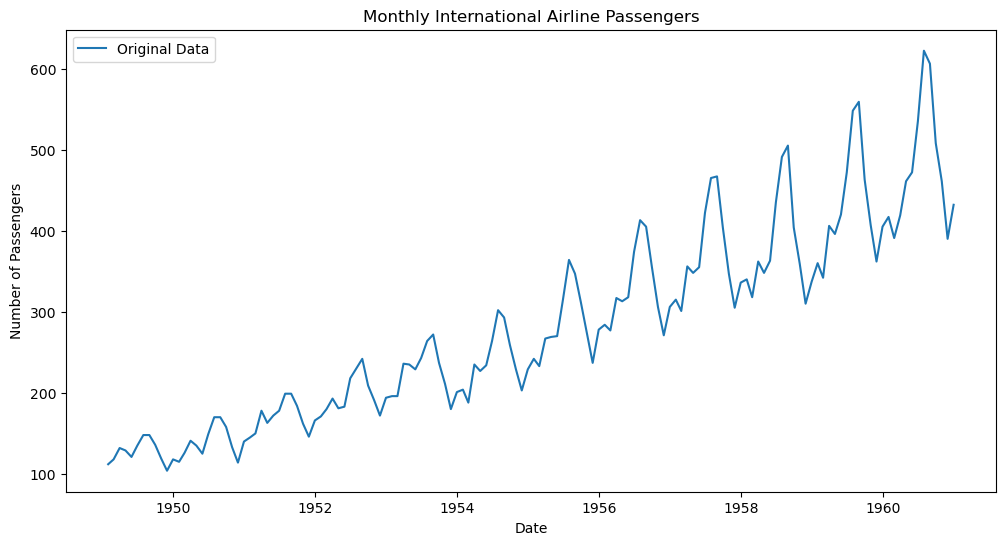

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.datasets import get_rdataset

data = get_rdataset("AirPassengers", "datasets")
df = data.data

df['Date'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M')
df.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original Data')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()



C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3264\4021258476.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), forecast, label='Forecast', color='red')


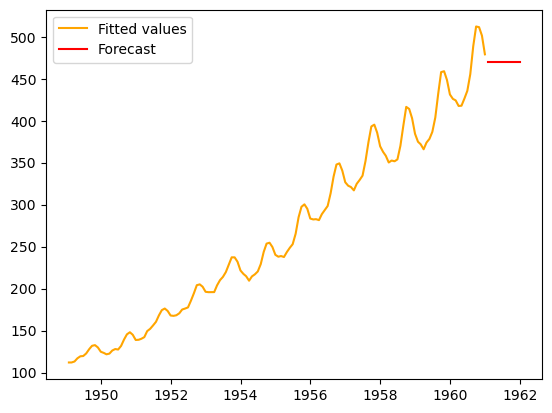

In [7]:
ses_model = SimpleExpSmoothing(df['value']).fit(smoothing_level=0.2, optimized=False)
forecast = ses_model.forecast(steps=12)

# Plot the fitted values and forecasted data
plt.plot(df['value'].index, ses_model.fittedvalues, label='Fitted values', color='orange')
plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.legend()
plt.show()
